# Example Log Analysis

In [1]:
import sys

sys.path.append("/home/tim_voxelai_com/ws/voxel")

In [2]:
from core.structs.frame import Frame
LOG_PATH = "gs://voxel-temp/logs/tim/temporal_decorator_2/americold/modesto/e_dock_north/ch22_1/scenarios/PARKING_DURATION/positive/42309/TemporalNode.json"

In [3]:
def frame_generator(log: list):
    for item in log:
        yield (item["epoch_timestamp_ms"], Frame.from_dict(item))

In [4]:
from core.infra.cloud.gcs_utils import read_from_gcs, does_gcs_blob_exists
import json
log_exists = does_gcs_blob_exists(LOG_PATH)
if log_exists:
    log =json.loads(read_from_gcs(LOG_PATH))

In [5]:
log_exists

True

In [6]:
frames = list(frame_generator(log))

# Example analysis

This just shows a basic example of how you may analyze the frame. For this, we are choosing to print out the velocity of track 106.

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(frames, columns=["time", "frame"])

In [9]:
def filter_actor(frame, track_id=108):
    actors = frame.actors
    for actor in actors:
        if actor.track_id == track_id:
            return actor.x_velocity_pixel_per_sec
    return None

actor_106 = df["frame"].apply(lambda x: filter_actor(x, 106))
actor_108 = df["frame"].apply(lambda x: filter_actor(x, 108))

In [10]:
time = df["time"]

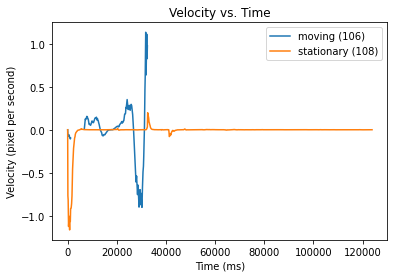

In [11]:
import matplotlib.pyplot as plt
plt.plot(time, actor_106, label="moving (106)")
plt.plot(time, actor_108, label="stationary (108)")

plt.xlabel("Time (ms)")
plt.ylabel("Velocity (pixel per second)")
plt.title("Velocity vs. Time")
plt.legend()